# PROBLEMA DE NEGÓCIO
#### **Precisamos desenvolver um sistema que Prevê a Demanda de Vendas do Produto Carro chefe da BRF**

# IMPORTAÇÃO DE DADOS

In [150]:
#Importação de pacotes
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('SeriesTemporaisDeploy.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# PRIMEIRAS VISUALIZAÇÕES

In [151]:
df.head()

,data,quantidade
0,2022-01-03,1500
1,2022-01-03,15
2,2022-01-03,18
3,2022-01-03,450
4,2022-01-03,3411


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        3114 non-null   object
 1   quantidade  3114 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.8+ KB


# MANIPULAÇÃO E TRTATAMENTO DE DADOS

In [153]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

### VERIFICANDO VALORES NULOS E DUPLICADOS

In [154]:
(df.isnull().sum() / len(df['data']))*100

data         0.00
quantidade   0.00
dtype: float64

In [155]:
df.duplicated().sum()

66

In [156]:
df = df.drop_duplicates()

# ANÁLISE EXPLORATÓRIA

In [157]:
data_min = df['data'].min()
data_max = df['data'].max()
print(f'Data mínima: {data_min}')
print(f'Data máxima: {data_max}')

Data mínima: 2022-01-03 00:00:00
Data máxima: 2024-03-28 00:00:00


### ESTATÍSTICA

In [158]:
df.describe()

,data,quantidade
count,3048,3048.00
mean,2023-01-12 14:26:55.748031488,2128.12
min,2022-01-03 00:00:00,-7431.00
25%,2022-06-10 00:00:00,330.00
50%,2023-01-09 00:00:00,957.00
75%,2023-08-01 00:00:00,2825.25
max,2024-03-28 00:00:00,21762.00
std,NaN,2927.77


### MODA

In [159]:
from statistics import mode
mode(df['quantidade'])

600

In [160]:
mode(df['data'])

Timestamp('2022-03-21 00:00:00')

### ASSIMETRIA

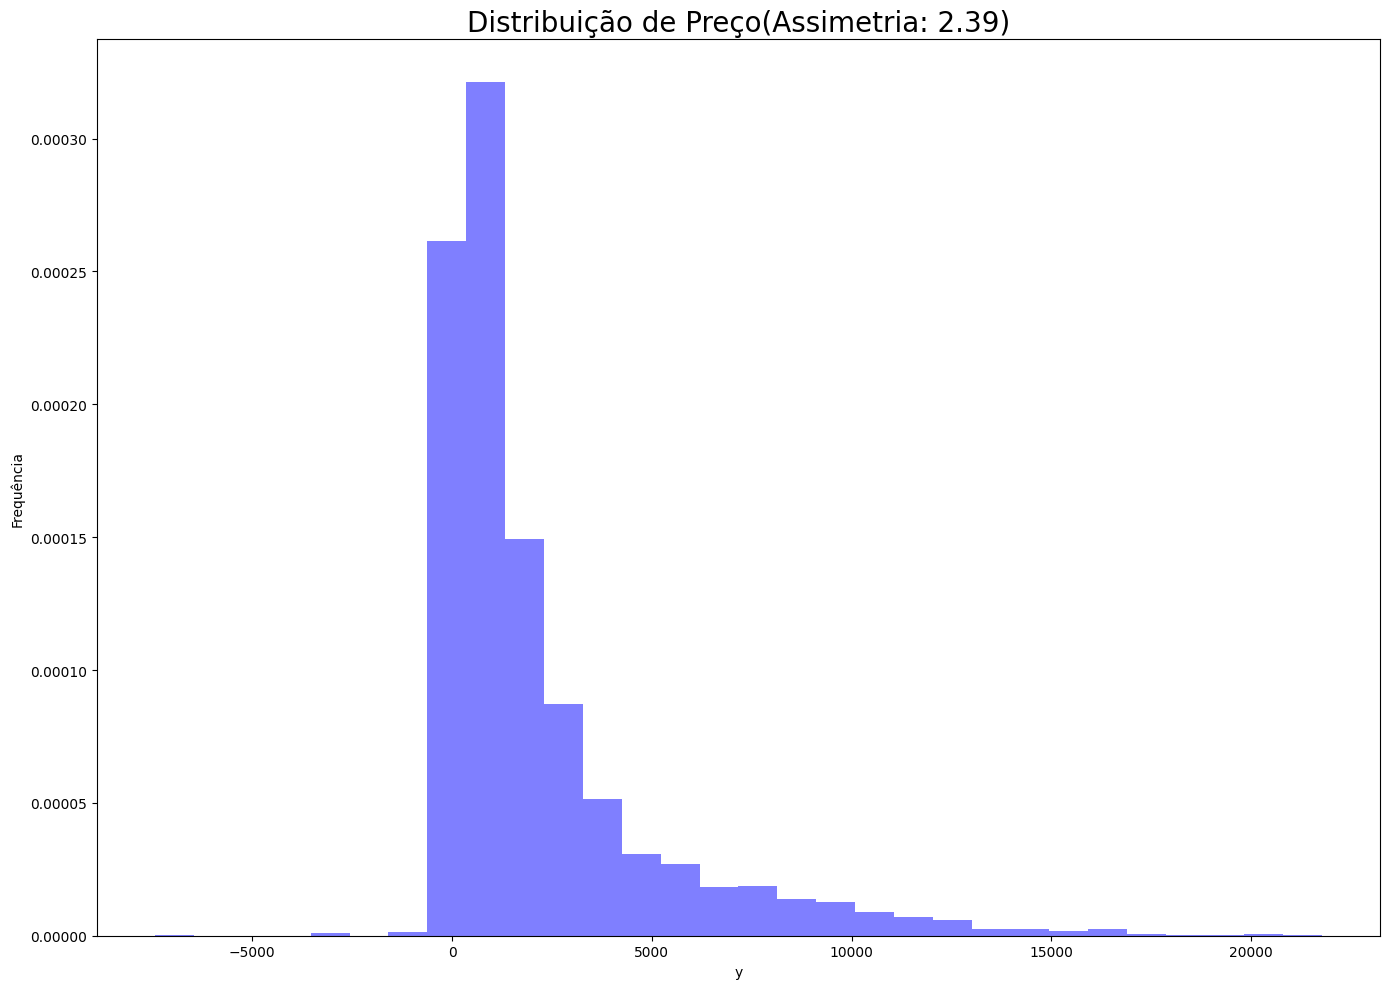

In [161]:
from scipy.stats import skew

y = df['quantidade']

# Calculando a assimetria dos dados
assimetria = skew(y)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(y, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Preço(Assimetria: {assimetria:.2f})')
plt.xlabel('y')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

### CURTOSE

In [162]:
df['quantidade'].kurt()

6.793567598932562

### TOTAL DE VALORES UNICOS EM CADA VARIAVEL

In [163]:
valores_unicos = []
for i in df.columns[0:2].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

data : 643
quantidade : 1096


### VERIFICANDO SE HÁ POSSIBILIDADE DE OUTLIERS 

quantidade : int64


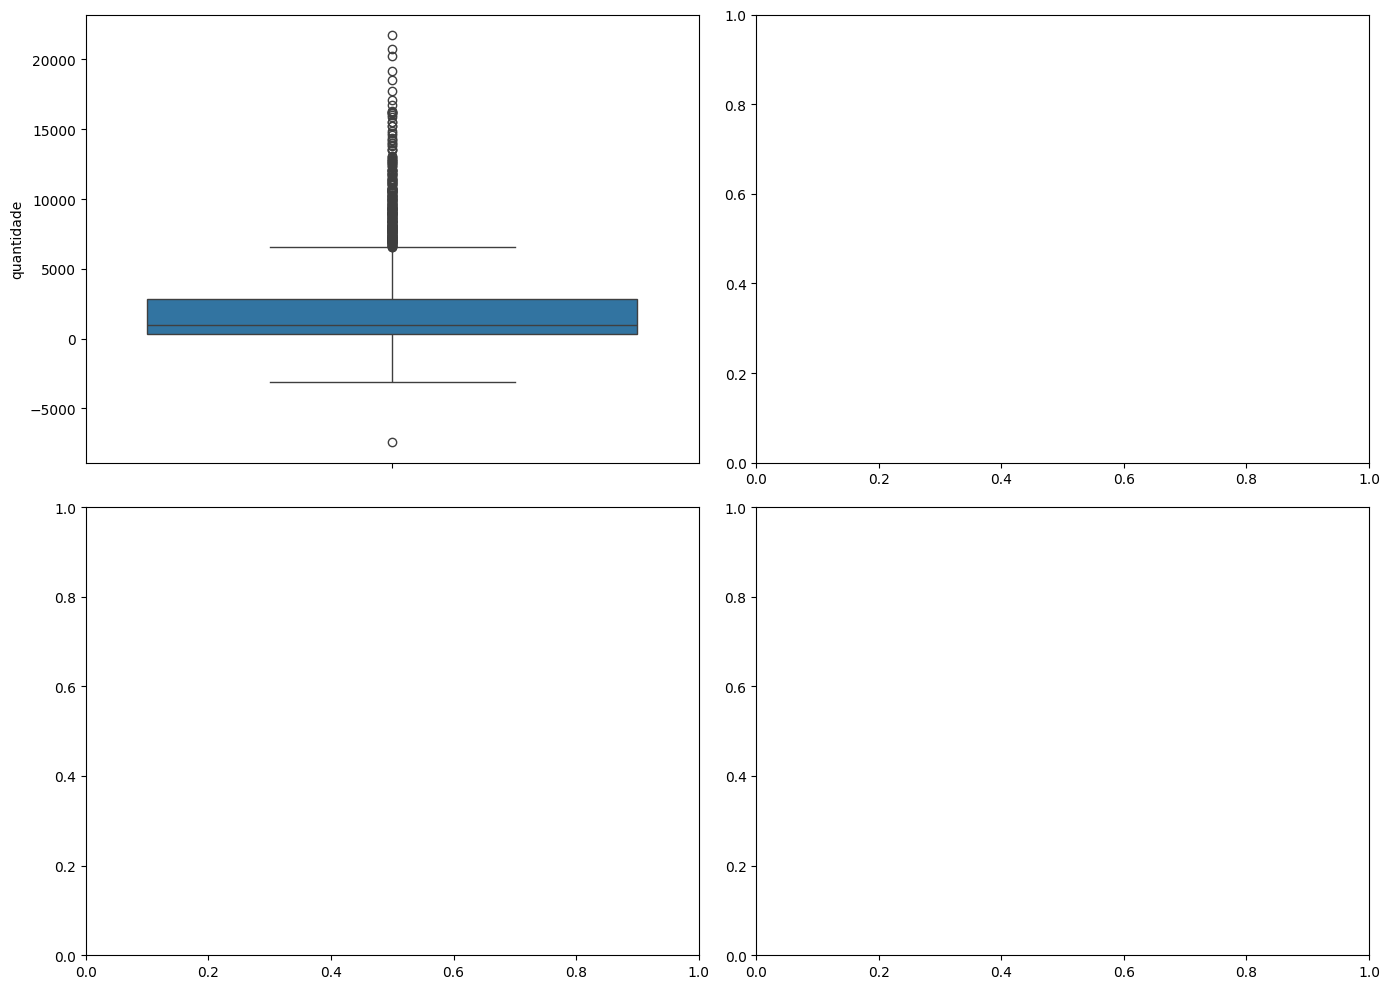

In [164]:
variaveis_numericas = []
for i in df.columns[0:16].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 2) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

# ANÁLISE DE DAODS

In [165]:
# Certifique-se de que a coluna 'data' está no formato datetime
df['data'] = pd.to_datetime(df['data'])

# Agora, agregando os dados por data e somando os valores de 'quantidade'
df_agregado = df.groupby('data')['quantidade'].sum().reset_index()

# Verificando as datas
data_min = df_agregado['data'].min()
data_max = df_agregado['data'].max()
duration = data_max - data_min
frequencia = df_agregado['data'].diff().mode()[0]  # Calcula a diferença entre as datas consecutivas e encontra a moda

print(f'Data mínima: {data_min}')
print(f'Data máxima: {data_max}')
print(f'Duração do período: {duration}')
print(f'Frequência mais comum dos registros: {frequencia}')

Data mínima: 2022-01-03 00:00:00
Data máxima: 2024-03-28 00:00:00
Duração do período: 815 days 00:00:00
Frequência mais comum dos registros: 1 days 00:00:00


In [166]:
df_agregado.head()

,data,quantidade
0,2022-01-03,7905
1,2022-01-04,6162
2,2022-01-05,6891
3,2022-01-06,11385
4,2022-01-07,20064


In [167]:
import plotly.express as px

# Criando o boxplot com Plotly
fig = px.box(df_agregado, y='quantidade', title='Boxplot da Quantidade Vendida')

# Mostrando o gráfico
fig.show()

In [168]:
# Filtrando o dataframe para eliminar registros com valores negativos (estornos)
df_filtrado = df[df['quantidade'] > 0]

# Agora df_filtrado contém apenas registros com quantidades positivas
# Verificando as primeiras linhas para confirmar
print(df_filtrado.head())

        data  quantidade
0 2022-01-03        1500
1 2022-01-03          15
2 2022-01-03          18
3 2022-01-03         450
4 2022-01-03        3411


In [169]:
import plotly.express as px

# Criando o boxplot com Plotly
fig = px.box(df_filtrado, y='quantidade', title='Boxplot da Quantidade Vendida')

# Mostrando o gráfico
fig.show()

# ANALISANDO AS SERIES TEMPORAIS

In [170]:
from sklearn.model_selection import TimeSeriesSplit

# Suponha que 'df_filtrado' é o seu dataframe após remover os estornos
df_filtrado.sort_values('data', inplace=True)
y = df_filtrado['quantidade']  # ou 'quantidade_liquida' se você calculou essa coluna

# Definição do número de splits para TSCV
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Aplicação do TSCV
for i, (train_index, test_index) in enumerate(tscv.split(y)):
    train = df_filtrado.iloc[train_index]
    test = df_filtrado.iloc[test_index]
    print(f'Split {i+1}')
    print(f'Treino de {train["data"].iloc[0]} até {train["data"].iloc[-1]}')
    print(f'Teste de {test["data"].iloc[0]} até {test["data"].iloc[-1]}')
    print('---')

Split 1
Treino de 2022-01-03 00:00:00 até 2022-04-14 00:00:00
Teste de 2022-04-14 00:00:00 até 2022-08-09 00:00:00
---
Split 2
Treino de 2022-01-03 00:00:00 até 2022-08-09 00:00:00
Teste de 2022-08-09 00:00:00 até 2023-01-07 00:00:00
---
Split 3
Treino de 2022-01-03 00:00:00 até 2023-01-07 00:00:00
Teste de 2023-01-09 00:00:00 até 2023-05-13 00:00:00
---
Split 4
Treino de 2022-01-03 00:00:00 até 2023-05-13 00:00:00
Teste de 2023-05-15 00:00:00 até 2023-10-20 00:00:00
---
Split 5
Treino de 2022-01-03 00:00:00 até 2023-10-20 00:00:00
Teste de 2023-10-20 00:00:00 até 2024-03-28 00:00:00
---


### Split 1

    Split 1: Início do conjunto de dados até aproximadamente 20% do período total.

    Treino de 2022-01-03 até 2022-04-14
    Teste de 2022-04-14 até 2022-08-09

    O primeiro split é importante para validar o desempenho inicial do modelo nas primeiras partes do conjunto de dados.



  ### Split 2

      Split 2: Início do conjunto de dados até aproximadamente 40% do período total.

      Treino de 2022-01-03 até 2022-08-09
      Teste de 2022-08-09 até 2023-01-10

      O segundo split expande o conjunto de treino para incluir mais dados, permitindo ao modelo aprender com um período maior.



  ### Split 3

    Split 3: Início do conjunto de dados até aproximadamente 60% do período total.

    Treino de 2022-01-03 até 2023-01-10
    Teste de 2023-01-10 até 2023-05-12

    No terceiro split, o modelo tem a oportunidade de treinar com metade do conjunto de dados, proporcionando uma visão mais completa do comportamento da série temporal.
    ---


   ### Split 4

    Split 4: Início do conjunto de dados até aproximadamente 80% do período total.

    Treino de 2022-01-03 até 2023-05-12
    Teste de 2023-05-12 até 2023-10-20

    O quarto split permite que o modelo seja testado em dados mais recentes após ter sido treinado em uma grande parte da série temporal 


   ### Split 5

    Split 5: Início do conjunto de dados até quase o final do período total.

    Treino de 2022-01-03 até 2023-10-20
    Teste de 2023-10-20 até 2024-03-28

    O quinto e último split testa o modelo na parte mais recente dos dados, garantindo que ele é capaz de prever as tendências mais atuais. 

## Capturar tendências, padrões sazonais e outras dependências temporais.

### 1. Criação de Variáveis Baseadas em LAGs
LAGs são valores anteriores na série temporal que podem ajudar a prever o valor futuro. A ideia é que observações passadas têm influência nos valores futuros.

Variáveis de LAG: Você pode criar variáveis que representam os valores da série em dias anteriores. Por exemplo, LAG1 poderia ser o valor de vendas do dia anterior, LAG2 o de dois dias atrás, e assim por diante

In [171]:
# Resetando o índice para garantir que ele seja único
df_filtrado.reset_index(inplace=True)

# Criando LAGs diretamente no DataFrame
df_filtrado['LAG1'] = df_filtrado['quantidade'].shift(1)
df_filtrado['LAG2'] = df_filtrado['quantidade'].shift(2)

# Garantindo que 'data' é uma coluna para extrair o dia da semana
df_filtrado['day_of_week'] = df_filtrado['data'].dt.dayofweek
dummies = pd.get_dummies(df_filtrado['day_of_week'], prefix='weekday')

# Concatenando as variáveis dummy ao DataFrame
df_filtrado = pd.concat([df_filtrado, dummies], axis=1)

# Mostrando o resultado
print(df_filtrado.head())

   index       data  quantidade    LAG1    LAG2  day_of_week  weekday_0  \
0      0 2022-01-03        1500     NaN     NaN            0       True   
1      1 2022-01-03          15 1500.00     NaN            0       True   
2      2 2022-01-03          18   15.00 1500.00            0       True   
3      3 2022-01-03         450   18.00   15.00            0       True   
4      4 2022-01-03        3411  450.00   18.00            0       True   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0      False      False      False      False      False      False  
1      False      False      False      False      False      False  
2      False      False      False      False      False      False  
3      False      False      False      False      False      False  
4      False      False      False      False      False      False  


# Análise do DataFrame

O resultado mostra que foram criadas variáveis de LAG e variáveis dummy para os dias da semana a partir dos dados de vendas. Aqui está uma análise detalhada das colunas geradas:

- `data`: A coluna de datas, servindo como índice temporal para os dados.
- `quantidade`: Representa a quantidade vendida no dia correspondente.
- `LAG1`: Reflete o valor da quantidade vendida no dia anterior, ajudando o modelo a entender a dependência das vendas no dia atual em relação ao anterior.
- `LAG2`: Representa o valor da quantidade vendida dois dias antes, ajudando a identificar padrões ou tendências que ocorrem com esse atraso.
- `day_of_week`: Mostra o dia da semana (0 para segunda-feira, 1 para terça-feira, etc.), útil para capturar padrões semanais de vendas.
- `weekday_0` a `weekday_6`: São variáveis dummy para cada dia da semana, úteis para modelar efeitos específicos dos dias nas vendas.

#### Insights:

1. **LAGs:**
   - Os valores `NaN` em `LAG1` e `LAG2` nas primeiras linhas são esperados devido à ausência de dados anteriores. Esses LAGs são cruciais para compreender como as vendas anteriores influenciam as atuais.

2. **Variáveis Dummy do Dia da Semana:**
   - As variáveis dummy (`weekday_0` a `weekday_6`) indicam claramente o dia da semana, permitindo ao modelo captar variações nas vendas que podem ocorrer de acordo com o dia da semana.

#### Próximos Passos:

- **Tratamento de NaN:** Antes de prosseguir para a modelagem, é necessário decidir como lidar com os valores `NaN` em `LAG1` e `LAG2`, possivelmente substituindo-os por 0, média ou mediana.
- **Análise de Padrões:** Examinar as correlações e padrões entre as vendas, LAGs e dias da semana pode revelar insights valiosos sobre o comportamento das vendas.
- **Modelagem de Séries Temporais:** Com as variáveis preparadas, é possível avançar na modelagem de séries temporais usando técnicas como ARIMA, SARIMA ou LSTM para prever vendas futuras.

### 2. Análise dos Dias da Semana
Dias da semana podem ter um impacto significativo nas vendas, com padrões variando entre dias úteis e fins de semana, por exemplo.

Variáveis Dummy para Dias da Semana: Crie variáveis dummy para cada dia da semana para capturar efeitos sazonais que variam nesses dias

In [172]:
# Calculando a correlação entre as variáveis
correlacoes = df_filtrado[['quantidade', 'LAG1', 'LAG2'] + [f'weekday_{i}' for i in range(7)]].corr()

# Exibindo a matriz de correlação
print(correlacoes)

            quantidade  LAG1  LAG2  weekday_0  weekday_1  weekday_2  \
quantidade        1.00 -0.06 -0.08       0.02       0.03      -0.01   
LAG1             -0.06  1.00 -0.06      -0.02       0.04       0.00   
LAG2             -0.08 -0.06  1.00      -0.04       0.02       0.03   
weekday_0         0.02 -0.02 -0.04       1.00      -0.23      -0.23   
weekday_1         0.03  0.04  0.02      -0.23       1.00      -0.23   
weekday_2        -0.01  0.00  0.03      -0.23      -0.23       1.00   
weekday_3        -0.02 -0.02 -0.03      -0.23      -0.23      -0.23   
weekday_4         0.03  0.02  0.02      -0.23      -0.23      -0.23   
weekday_5        -0.08 -0.02 -0.01      -0.12      -0.12      -0.12   
weekday_6        -0.02 -0.01  0.03      -0.01      -0.01      -0.01   

            weekday_3  weekday_4  weekday_5  weekday_6  
quantidade      -0.02       0.03      -0.08      -0.02  
LAG1            -0.02       0.02      -0.02      -0.01  
LAG2            -0.03       0.02      -0.01    

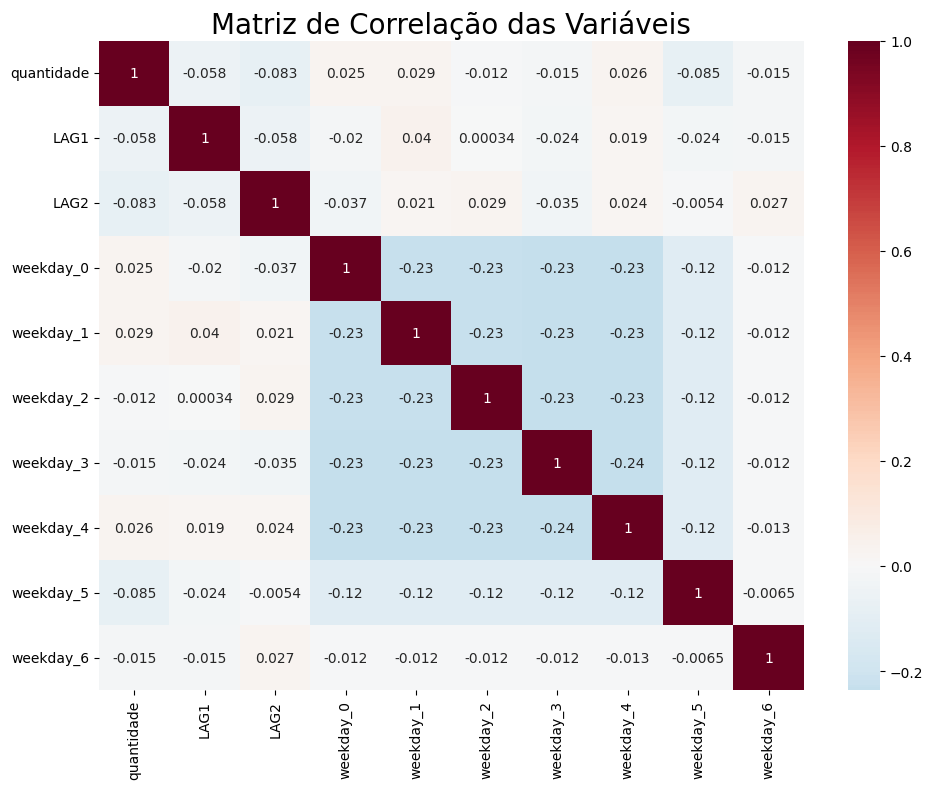

In [173]:
# Calculando a matriz de correlação
correlacoes = df_filtrado[['quantidade', 'LAG1', 'LAG2'] + [f'weekday_{i}' for i in range(7)]].corr()

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o heatmap
sns.heatmap(correlacoes, annot=True, cmap='RdBu_r', center=0)

# Adicionando títulos e labels
plt.title('Matriz de Correlação das Variáveis')
plt.show()

#### Correlação entre Vendas e LAGs
**quantidade e LAG1**: A correlação é ligeiramente negativa (-0.054938), o que indica uma relação muito fraca e inversa entre as vendas do dia anterior e as vendas atuais. Isso significa que um aumento nas vendas no dia anterior não está significativamente relacionado a um aumento ou diminuição nas vendas do dia atual.


**quantidade e LAG2:** Similarmente, a correlação entre as vendas atuais e as de dois dias atrás é também levemente negativa (-0.071260), sugerindo uma influência mínima das vendas de dois dias atrás nas vendas atuais.

**Correlação entre Vendas e Dias da Semana**

**weekday_0 a weekday_6 (Segunda a Domingo)**: As correlações entre as vendas e os dias da semana variam um pouco, mas em geral são muito baixas, o que sugere que não há uma forte influência do dia específico da semana nas vendas totais.

No entanto, alguns pontos a notar:

**weekday_5 (Sábado):** Tem uma correlação mais negativa com as vendas (-0.085111) do que os outros dias, o que pode indicar vendas mais baixas neste dia em particular ou menos variação nas vendas relacionada a esse dia.

**weekday_4 (Sexta-feira):** Mostra uma correlação ligeiramente positiva com as vendas (0.028207), o que pode sugerir um pequeno aumento ou variação positiva nas vendas nesta dia.

### 3. Verificação de Sazonalidade
Além dos dias da semana, outras sazonalidades podem ser relevantes, como mensal, trimestral, ou sazonalidade de feriados.

Variáveis Sazonais: Identifique padrões sazonais nos dados e crie variáveis para capturá-los, como indicadores de mês, trimestre, ou feriados.

In [174]:
# Extraíndo o mês da data e criando uma coluna 'mês'
df_filtrado['mes'] = df_filtrado['data'].dt.month

# Opcionalmente, criar variáveis dummy para os meses
mes_dummies = pd.get_dummies(df_filtrado['mes'], prefix='mes')
df_filtrado = pd.concat([df_filtrado, mes_dummies], axis=1)

In [175]:
# Extraíndo o trimestre da data e criando uma coluna 'trimestre'
df_filtrado['trimestre'] = df_filtrado['data'].dt.to_period('Q')

#### Instalando biblioteca de calendário

In [176]:
!pip install workalendar


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:

from workalendar.america import Brazil

# Crie uma instância do calendário
cal = Brazil()

# Verificar se cada data no DataFrame é um feriado
df_filtrado['feriado'] = df_filtrado['data'].apply(lambda x: cal.is_holiday(x)).astype(int)

In [178]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3025 non-null   int64         
 1   data         3025 non-null   datetime64[ns]
 2   quantidade   3025 non-null   int64         
 3   LAG1         3024 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3025 non-null   int32         
 6   weekday_0    3025 non-null   bool          
 7   weekday_1    3025 non-null   bool          
 8   weekday_2    3025 non-null   bool          
 9   weekday_3    3025 non-null   bool          
 10  weekday_4    3025 non-null   bool          
 11  weekday_5    3025 non-null   bool          
 12  weekday_6    3025 non-null   bool          
 13  mes          3025 non-null   int32         
 14  mes_1        3025 non-null   bool          
 15  mes_2        3025 non-null   bool          
 16  mes_3 

### 4. Decomposição de Séries Temporais
Uma análise mais aprofundada pode envolver a decomposição da série temporal em tendência, sazonalidade e resíduo, o que pode fornecer insights sobre a natureza dos dados.

Tendência e Sazonalidade: Utilize técnicas de decomposição para extrair e talvez modelar separadamente a tendência e a sazonalidade da série.

#### **A decomposição permite analisar as componentes individuais da série temporal:**

Tendência: Mostra a direção de longo prazo dos dados, permitindo identificar se a série está aumentando, diminuindo ou está estável ao longo do tempo.
Sazonalidade: Revela padrões que se repetem em intervalos regulares, como diariamente, semanalmente, mensalmente, etc.
Resíduo: Compreende os elementos aleatórios ou irregulares que não são explicados pela tendência ou sazonalidade.

**Tendência**: Mostra a direção geral dos seus dados ao longo do tempo, como se as vendas estão aumentando, diminuindo ou se mantendo estáveis a longo prazo.

**Sazonalidade**: Mostra padrões que se repetem em intervalos regulares, como aumentos nas vendas todo mês de dezembro, ou todo dia da semana.

**Resíduos**: São o que sobra depois de retirarmos a tendência e a sazonalidade, geralmente são variações aleatórias que não seguem um padrão regular.

#### Como é feita a separação?

1. **Tendência**
Para identificar a tendência, o algoritmo calcula uma média móvel dos dados. Isso suaviza as variações de curto prazo e destaca os padrões de longo prazo. Por exemplo, se usarmos uma média móvel de 365 dias em dados diários, a tendência em cada ponto será a média dos valores dos 365 dias anteriores.

2. **Sazonalidade**
Depois de remover a tendência dos dados originais (subtraindo-a), o algoritmo analisa os dados restantes para identificar padrões que se repetem em intervalos regulares, como diariamente, mensalmente ou anualmente. Isso é feito agrupando os dados por período (como dias do ano) e calculando a média para cada grupo, o que representa o componente sazonal.

3. **Resíduos**
O que sobra após remover a tendência e a sazonalidade dos dados originais é considerado resíduo. Matematicamente, os resíduos são calculados subtraindo os componentes de tendência e sazonalidade dos dados originais. Eles representam a flutuação aleatória dos dados após remover os padrões sistemáticos de tendência e sazonalidade.

## Usando Python/statsmodel

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponha que 'quantidade' é a coluna de interesse
# O DataFrame deve estar ordenado por data e indexado por ela
decomposition = seasonal_decompose(df_filtrado['quantidade'], model='additive', period=365)

In [180]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Criando subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduo'))

# Adicionando a série original
fig.add_trace(go.Scatter(x=df_filtrado.index, y=df_filtrado['quantidade'], name='Original'), row=1, col=1)

# Adicionando a tendência
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.trend, name='Tendência'), row=2, col=1)

# Adicionando a sazonalidade
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.seasonal, name='Sazonalidade'), row=3, col=1)

# Adicionando o resíduo
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.resid, name='Resíduo'), row=4, col=1)

# Atualizando o layout
fig.update_layout(height=800, width=700, title_text="Decomposição de Séries Temporais")
fig.show()

#### **Original**
A série original mostra as vendas ao longo do tempo. Altos e baixos indicam variações nas vendas, que podem ser devidas a fatores sazonais, eventos ou outras influências.

**Tendência**

A tendência parece suavizar as flutuações de curto prazo e mostra um movimento geral das vendas ao longo do tempo. Se há um padrão de subida ou descida na tendência, isso pode indicar um crescimento ou declínio no interesse ou demanda geral pelo produto.

Observar qualquer mudança consistente na tendência ao longo do tempo é importante. Por exemplo, se a tendência está consistentemente subindo ou descendo.

**Sazonalidade**

O componente sazonal exibe padrões que se repetem com regularidade ao longo da série temporal. Esse padrão pode corresponder a fatores sazonais, como feriados, estações do ano, ou eventos específicos que impactam as vendas.
A sazonalidade mostra picos e vales que podem ser anuais, mensais, semanais etc. Verificar a amplitude e a frequência desses ciclos pode ajudar a entender quão significativos são os efeitos sazonais e quando eles ocorrem.

**Resíduo**

Os resíduos representam a variação nas vendas que não é explicada pela tendência nem pela sazonalidade. Isso pode incluir efeitos aleatórios ou não capturados pelo modelo de decomposição, como campanhas de marketing, mudanças econômicas não previstas ou qualquer outro fator aleatório.
Resíduos com grandes desvios da linha zero podem indicar eventos ou influências não modeladas na série temporal. Se os resíduos parecem ser grandes ou apresentam padrões não aleatórios, isso pode sugerir que o modelo de decomposição não capturou todos os aspectos dos dados.


#### **Conclusão da Análise**

Analisar se a **tendência** é estável, crescente ou decrescente ajuda a entender o comportamento geral das vendas ao longo do tempo.

Avaliar a **sazonalidade** ajuda no planejamento de ações de marketing e estoque.

Investigar os **resíduos** pode indicar a necessidade de refinar o modelo ou incluir outras variáveis que podem estar afetando as vendas.

A decomposição ajuda a preparar o terreno para modelagem preditiva, como ajustar modelos de séries temporais (ARIMA, SARIMA) ou redes neurais (LSTM), pois você terá uma noção mais clara dos padrões subjacentes aos dados.

# MACHINE LARNING

## PRÉ-PROCESSAMENTO

## LSTM

In [181]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3025 non-null   int64         
 1   data         3025 non-null   datetime64[ns]
 2   quantidade   3025 non-null   int64         
 3   LAG1         3024 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3025 non-null   int32         
 6   weekday_0    3025 non-null   bool          
 7   weekday_1    3025 non-null   bool          
 8   weekday_2    3025 non-null   bool          
 9   weekday_3    3025 non-null   bool          
 10  weekday_4    3025 non-null   bool          
 11  weekday_5    3025 non-null   bool          
 12  weekday_6    3025 non-null   bool          
 13  mes          3025 non-null   int32         
 14  mes_1        3025 non-null   bool          
 15  mes_2        3025 non-null   bool          
 16  mes_3 

In [182]:
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3025 non-null   int64         
 1   data         3025 non-null   datetime64[ns]
 2   quantidade   3025 non-null   int64         
 3   LAG1         3024 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3025 non-null   int32         
 6   weekday_0    3025 non-null   bool          
 7   weekday_1    3025 non-null   bool          
 8   weekday_2    3025 non-null   bool          
 9   weekday_3    3025 non-null   bool          
 10  weekday_4    3025 non-null   bool          
 11  weekday_5    3025 non-null   bool          
 12  weekday_6    3025 non-null   bool          
 13  mes          3025 non-null   int32         
 14  mes_1        3025 non-null   bool          
 15  mes_2        3025 non-null   bool          
 16  mes_3 

In [183]:
df_filtrado_distinct = df_filtrado.drop_duplicates(subset=['data', 'quantidade']).loc[:, ['data', 'quantidade']]
df_filtrado_distinct.head()

,data,quantidade
0,2022-01-03,1500
1,2022-01-03,15
2,2022-01-03,18
3,2022-01-03,450
4,2022-01-03,3411


In [184]:
# Verificar se há valores NaN no conjunto de dados original
print(df_filtrado.isnull().sum())



index          0
data           0
quantidade     0
LAG1           1
LAG2           2
day_of_week    0
weekday_0      0
weekday_1      0
weekday_2      0
weekday_3      0
weekday_4      0
weekday_5      0
weekday_6      0
mes            0
mes_1          0
mes_2          0
mes_3          0
mes_4          0
mes_5          0
mes_6          0
mes_7          0
mes_8          0
mes_9          0
mes_10         0
mes_11         0
mes_12         0
trimestre      0
feriado        0
dtype: int64


In [185]:
# Verificar os valores máximo e mínimo após a normalização
print('Valor máximo após normalização:', np.max(scaled_features))
print('Valor mínimo após normalização:', np.min(scaled_features))


Valor máximo após normalização: 1.0
Valor mínimo após normalização: 0.0


In [186]:
df_filtrado = df_filtrado.dropna()

In [187]:
# Verificar valores nulos em cada coluna
print(df_filtrado.isnull().sum())


index          0
data           0
quantidade     0
LAG1           0
LAG2           0
day_of_week    0
weekday_0      0
weekday_1      0
weekday_2      0
weekday_3      0
weekday_4      0
weekday_5      0
weekday_6      0
mes            0
mes_1          0
mes_2          0
mes_3          0
mes_4          0
mes_5          0
mes_6          0
mes_7          0
mes_8          0
mes_9          0
mes_10         0
mes_11         0
mes_12         0
trimestre      0
feriado        0
dtype: int64


In [188]:
# Obter informações sobre o DataFrame
print(df_filtrado.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 2 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3023 non-null   int64         
 1   data         3023 non-null   datetime64[ns]
 2   quantidade   3023 non-null   int64         
 3   LAG1         3023 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3023 non-null   int32         
 6   weekday_0    3023 non-null   bool          
 7   weekday_1    3023 non-null   bool          
 8   weekday_2    3023 non-null   bool          
 9   weekday_3    3023 non-null   bool          
 10  weekday_4    3023 non-null   bool          
 11  weekday_5    3023 non-null   bool          
 12  weekday_6    3023 non-null   bool          
 13  mes          3023 non-null   int32         
 14  mes_1        3023 non-null   bool          
 15  mes_2        3023 non-null   bool          
 16  mes_3      

In [189]:
import time
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Ordenando o DataFrame cronologicamente
df_filtrado.sort_values('data', inplace=True)

# Normalizando as colunas de features, excluindo 'data' e 'trimestre'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_filtrado.drop(['data', 'trimestre'], axis=1))

# Função para criar um dataset estruturado para o modelo LSTM
def create_dataset(dataset, look_back=1, forecast_horizon=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        y.append(dataset[i + look_back:i + look_back + forecast_horizon, 0])
    return np.array(X), np.array(y)

# Definindo look_back e forecast_horizon
look_back = 30
forecast_horizon = 15

# Criando a estrutura de dados para o modelo LSTM
X, y = create_dataset(scaled_features, look_back, forecast_horizon)

# Dividindo os dados com TSCV
tscv = TimeSeriesSplit(n_splits=5)

test_loss_list = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Redimensionando para [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    # Construindo a arquitetura do modelo LSTM
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, X_train.shape[2])))
    model.add(Dense(forecast_horizon))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Treinando o modelo
    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    end_time = time.time()

    training_time = end_time - start_time
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    test_loss_list.append(test_loss)

    print(f'Fold {fold+1}')
    print(f'Training time: {training_time:.2f} seconds')
    print(f'Test Loss: {test_loss}\n')

# Mostrar as métricas finais após todas as folds
average_test_loss = np.mean(test_loss_list)
print(f'Average Test Loss after all folds: {average_test_loss}')

# Salvando o modelo treinado
model.save('my_lstm_model.h5')

# O código para download do modelo, caso esteja usando um ambiente como Google Colab, ficaria aqui


Fold 1
Training time: 15.35 seconds
Test Loss: 0.01917700469493866

Fold 2
Training time: 20.02 seconds
Test Loss: 0.038294654339551926

Fold 3
Training time: 27.02 seconds
Test Loss: 0.017860325053334236

Fold 4
Training time: 32.29 seconds
Test Loss: 0.018321726471185684



Fold 5
Training time: 37.65 seconds
Test Loss: 0.014661534689366817

Average Test Loss after all folds: 0.021663049049675465


In [190]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular as métricas de regressão para cada fold e armazená-las para média posterior
mae_list = []
mse_list = []
r2_list = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Adicionando métricas às listas
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f'Fold {fold+1}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R2: {r2:.4f}\n')

# Calculando a média das métricas
average_mse = np.mean(mse_list)
average_mae = np.mean(mae_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse:.4f}')
print(f'Average MAE: {average_mae:.4f}')
print(f'Average R2: {average_r2:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold 1
MSE: 0.0012
MAE: 0.0320
R2: 0.4792

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 2
MSE: 0.0006
MAE: 0.0180
R2: 0.7455

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 3
MSE: 0.0023
MAE: 0.0387
R2: 0.0064

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 4
MSE: 0.0048
MAE: 0.0636
R2: -1.1747

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 5
MSE: 0.0044
MAE: 0.0617
R2: -0.9746

Average MSE: 0.0027
Average MAE: 0.0428
Average R2: -0.1836


### Prever 15d

In [191]:
import plotly.express as px
import pandas as pd

# Suponha que 'df_filtrado', 'model' e 'scaler' já estão definidos e prontos para uso

# Preparar os dados de entrada para a previsão
look_back = 30  # O mesmo valor usado durante o treinamento do modelo
forecast_horizon = 15  # Prever os próximos 15 dias

# Utilizar os últimos 'look_back' dias como entrada
X_input = df_filtrado[-look_back:].drop(['data', 'trimestre'], axis=1)

# Escalar os dados de entrada conforme o modelo
X_input_scaled = scaler.transform(X_input)

# Reshape para o formato [1, look_back, num_features] como o modelo espera
num_features = X_input_scaled.shape[1]
X_input_scaled = X_input_scaled.reshape(1, look_back, num_features)

# Fazer a previsão com o modelo
predicted = model.predict(X_input_scaled)

# Ajustar a forma da previsão para corresponder ao número de características do scaler
predicted_repeated = np.repeat(predicted, num_features, axis=1)

# Inverter a transformação de escala
predicted_inverse = scaler.inverse_transform(predicted_repeated.reshape(-1, num_features))

# Extrair apenas a coluna de interesse da previsão
predicted_values = predicted_inverse[:, 0]

# Criar um DataFrame com a previsão
predicted_dates = pd.date_range(start=df_filtrado['data'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
predicted_df = pd.DataFrame(predicted_values, index=predicted_dates, columns=['Previsão'])

# Plotar a previsão com Plotly Express
fig = px.line(predicted_df, x=predicted_df.index, y='Previsão', title='Previsão para os próximos 15 dias')
fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [192]:
df_agregado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        643 non-null    datetime64[ns]
 1   quantidade  643 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.2 KB


In [193]:
import plotly.express as px

# Criar o gráfico de linhas com Plotly Express
fig = px.line(df_agregado, x='data', y='quantidade', title='Quantidade ao longo do tempo')

# Mostrar o gráfico
fig.show()

In [194]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2024-03-29 to 2024-04-12
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Previsão  15 non-null     float32
dtypes: float32(1)
memory usage: 180.0 bytes


## Prophet

In [195]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 2 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3023 non-null   int64         
 1   data         3023 non-null   datetime64[ns]
 2   quantidade   3023 non-null   int64         
 3   LAG1         3023 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3023 non-null   int32         
 6   weekday_0    3023 non-null   bool          
 7   weekday_1    3023 non-null   bool          
 8   weekday_2    3023 non-null   bool          
 9   weekday_3    3023 non-null   bool          
 10  weekday_4    3023 non-null   bool          
 11  weekday_5    3023 non-null   bool          
 12  weekday_6    3023 non-null   bool          
 13  mes          3023 non-null   int32         
 14  mes_1        3023 non-null   bool          
 15  mes_2        3023 non-null   bool          
 16  mes_3      

In [196]:
df_filtrado.describe()

,index,data,quantidade,LAG1,LAG2,day_of_week,mes,feriado
count,3023.00,3023,3023.00,3023.00,3023.00,3023.00,3023.00,3023.00
mean,1557.25,2023-01-12 12:20:43.268276480,2152.33,2152.07,2152.11,2.20,5.68,0.00
min,2.00,2022-01-03 00:00:00,3.00,3.00,3.00,0.00,1.00,0.00
25%,783.50,2022-06-10 00:00:00,345.00,345.00,345.00,1.00,3.00,0.00
50%,1550.00,2023-01-09 00:00:00,963.00,963.00,963.00,2.00,5.00,0.00
75%,2340.50,2023-08-01 00:00:00,2878.50,2878.50,2878.50,4.00,9.00,0.00
max,3113.00,2024-03-28 00:00:00,21762.00,21762.00,21762.00,6.00,12.00,0.00
std,899.06,NaN,2923.55,2923.70,2923.69,1.54,3.44,0.00


In [197]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['data', 'quantidade']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a série prevista
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\0lqwua3i.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\pwcc4ct_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=13573', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\0lqwua3i.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\pwcc4ct_.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\prophet_modelotpxiumb\\prophet_model-20240408115709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:09 - cmdstanpy - INFO - 

In [198]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['data', 'quantidade']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Filtrar a previsão a partir da última data da série histórica
forecast_from_last_date = forecast[forecast['ds'] > df_filtrado_prophet['ds'].iloc[-1]]

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a série prevista a partir da última data da série histórica
fig.add_trace(go.Scatter(x=forecast_from_last_date['ds'], y=forecast_from_last_date['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\ylw6y5sz.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\6tc1bp96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=10827', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\ylw6y5sz.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\6tc1bp96.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\prophet_modelzaji01vk\\prophet_model-20240408115709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:09 - cmdstanpy - INFO - 

In [199]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['data', 'quantidade']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Calcular as médias móveis de 15 e 7 dias para todo o período
df_filtrado_prophet['MM15'] = df_filtrado_prophet['y'].rolling(window=15).mean()
df_filtrado_prophet['MM7'] = df_filtrado_prophet['y'].rolling(window=7).mean()

# Filtrar as datas após 28/03 e até 15 dias depois
forecast_filtered = forecast[(forecast['ds'] >= '2024-03-28') & (forecast['ds'] <= '2024-04-12')]

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a média móvel de 15 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['MM15'], mode='lines', name='Média Móvel 15 dias'))

# Adicionar a média móvel de 7 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['MM7'], mode='lines', name='Média Móvel 7 dias'))

# Adicionar a série prevista apenas para os 15 dias após 28/03
fig.add_trace(go.Scatter(x=forecast_filtered['ds'], y=forecast_filtered['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista com Médias Móveis', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\478n0ryj.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\8na04tz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=48378', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\478n0ryj.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\8na04tz1.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\prophet_modeljojc0sf1\\prophet_model-20240408115710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:10 - cmdstanpy - INFO - 

<bound method BaseFigure.show of Figure({
    'data': [{'mode': 'lines',
              'name': 'Série Histórica',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 3, 0, 0),
                          datetime.datetime(2022, 1, 4, 0, 0),
                          datetime.datetime(2022, 1, 5, 0, 0), ...,
                          datetime.datetime(2024, 3, 26, 0, 0),
                          datetime.datetime(2024, 3, 27, 0, 0),
                          datetime.datetime(2024, 3, 28, 0, 0)], dtype=object),
              'y': array([  18,  600, 2700, ..., 5943,  360,  900], dtype=int64)},
             {'mode': 'lines',
              'name': 'Média Móvel 15 dias',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 3, 0, 0),
                          datetime.datetime(2022, 1, 4, 0, 0),
                          datetime.datetime(2022, 1, 5, 0, 0), ...,
                          datetime.datetime(2024, 3, 26, 0, 0),
 

In [200]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 2 to 3024
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3023 non-null   int64         
 1   data         3023 non-null   datetime64[ns]
 2   quantidade   3023 non-null   int64         
 3   LAG1         3023 non-null   float64       
 4   LAG2         3023 non-null   float64       
 5   day_of_week  3023 non-null   int32         
 6   weekday_0    3023 non-null   bool          
 7   weekday_1    3023 non-null   bool          
 8   weekday_2    3023 non-null   bool          
 9   weekday_3    3023 non-null   bool          
 10  weekday_4    3023 non-null   bool          
 11  weekday_5    3023 non-null   bool          
 12  weekday_6    3023 non-null   bool          
 13  mes          3023 non-null   int32         
 14  mes_1        3023 non-null   bool          
 15  mes_2        3023 non-null   bool          
 16  mes_3      

In [201]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['data', 'quantidade']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Adicionar 15 dias ao último ponto de dados observado para prorrogar as médias móveis
last_date = df_filtrado_prophet['ds'].max()
future_dates_mm = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15)

# Calcular as médias móveis de 15 e 7 dias para todo o período, incluindo os 15 dias a mais
df_filtrado_prophet_extended = pd.concat([df_filtrado_prophet, pd.DataFrame({'ds': future_dates_mm})])
df_filtrado_prophet_extended['MM15'] = df_filtrado_prophet_extended['y'].rolling(window=15).mean()
df_filtrado_prophet_extended['MM7'] = df_filtrado_prophet_extended['y'].rolling(window=7).mean()

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['y'], mode='lines', name='Série Histórica'))

# Adicionar a média móvel de 15 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['MM15'], mode='lines', name='Média Móvel 15 dias'))

# Adicionar a média móvel de 7 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['MM7'], mode='lines', name='Média Móvel 7 dias'))

# Adicionar a série prevista
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista com Médias Móveis', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\f8gbmjeb.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpvtiu_q13\2lfd764f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=11137', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\f8gbmjeb.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\2lfd764f.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpvtiu_q13\\prophet_modelwlnnh95s\\prophet_model-20240408115710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:10 - cmdstanpy - INFO - 

In [202]:
import joblib

# Supondo que 'model_prophet' é o seu modelo Prophet treinado
joblib.dump(model_prophet, "prophet-model.pkl")

['prophet-model.pkl']